# Create outerCV

In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from mcs_kfold import MCSKFold

# load data

In [2]:
y_all = pd.read_csv("../data/Xy_all.csv", index_col="group.cmp")[["SEX.男1.女0","Age"]]
used_id = joblib.load("../data/selected_1008id.pkl")  # Load the list of selected IDs

/Users/s_magi/anaconda3/envs/tsfresh_publish/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (3,43,47,48,69,70,72,77,79,80,81,82,83,84,85,86,88,90) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
y_all["Age_bin_12y"] = y_all["Age"] // 12
y = y_all.loc[y_all.index.isin(used_id)]

In [4]:
y.to_csv("../processed_data/y.csv")

(array([ 34.,   0., 394.,   0.,   0., 413.,   0., 145.,   0.,  22.]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8, 5.2, 5.6, 6. ]),
 <BarContainer object of 10 artists>)

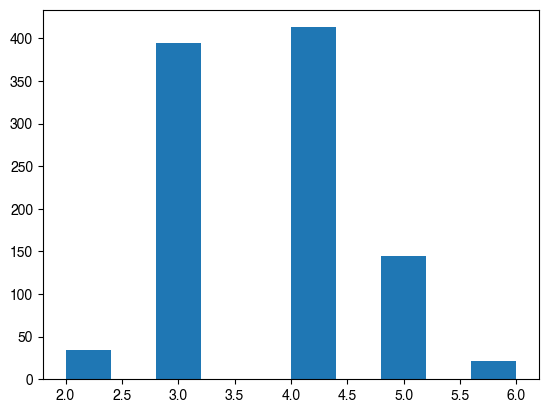

In [5]:
# Plot the results
plt.hist(y["Age_bin_12y"])

## Stratified extraction referred to multiple variables

In [7]:
y

,SEX.男1.女0,Age,Age_bin_12y
group.cmp,,,
20161201-222 Right,1.0,47.0,3.0
20161202-201 Right,1.0,57.0,4.0
20161202-204 Right,1.0,53.0,4.0
20161202-212 Right,1.0,53.0,4.0
20161202-214 Right,1.0,51.0,4.0
...,...,...,...
20181102-211 Right,0.0,67.0,5.0
20181102-221 Right,1.0,58.0,4.0
20181107-223 Right,1.0,50.0,4.0


In [8]:
num_cv = 5
max_iter = 100
shuffle_mc = True
SEED = 2022
mcskf = MCSKFold(n_splits=num_cv, max_iter=max_iter, shuffle_mc=shuffle_mc, global_seed=SEED)

target_cols = ["Age_bin_12y", "SEX.男1.女0"]

indices = mcskf.split(df=y,target_cols=target_cols)

# convert index num to ID
str_indices = []
for train_idx, test_idx in indices:
    train_ids = y.iloc[train_idx].index.tolist()
    test_ids = y.iloc[test_idx].index.tolist()
    str_indices.append((train_ids, test_ids))

# foldsをpickleとして保存
pd.to_pickle(str_indices, "../processed_data/indices_5folds.pkl")

#folds to csv
#pd.to_pickle(indices, "../processed_data/indices_5folds.pkl")

In [9]:
str_indices

[(['20161201-222 Right',
   '20161202-201 Right',
   '20161202-204 Right',
   '20161202-212 Right',
   '20161202-214 Right',
   '20161205-201 Right',
   '20161205-206 Right',
   '20161205-211 Right',
   '20161205-212 Right',
   '20161206-202 Right',
   '20161206-208 Right',
   '20161206-209 Right',
   '20161206-221 Right',
   '20161207-202 Right',
   '20161208-206 Right',
   '20161208-227 Right',
   '20161209-221 Right',
   '20161212-202 Right',
   '20161212-205 Right',
   '20161212-212 Right',
   '20161213-201 Right',
   '20161213-222 Right',
   '20161214-206 Right',
   '20161214-207 Right',
   '20161214-221 Right',
   '20161214-222 Right',
   '20161214-225 Right',
   '20161214-226 Right',
   '20161215-209 Right',
   '20161215-221 Right',
   '20161216-204 Right',
   '20161216-207 Right',
   '20161216-213 Right',
   '20161219-202 Right',
   '20161219-203 Right',
   '20161219-208 Right',
   '20161220-201 Right',
   '20161220-204 Right',
   '20161220-207 Right',
   '20161220-208 Right',
